
# Hito 1: *US Accidents*

Integrantes:

*   Francisco Cid
*   Saul Cifuentes
*   José Gutierrez
*   Héctor Sepúlveda





## Mejoras al Hito 1


*   Se cambia totalmente la motivación.
*   Se agrega la fuente del conjunto de datos.
*   Se realiza una nueva exploración, orientada a la problemática.
*   Se refina el enfoque de las problemáticas.



## Indice
 

1. [Contexto](#Contexto)
2. [Motivación](#Motivación)
3. [Exploración de datos](#Exploración)
4. [Descripción de atributos](#Descripción_Atri)
  * [4.1 Contexto Dataset](#ContextoData)
  * [4.2 Explorando columnas](#EXColumnas)
  * [4.3 Correlación de datos](#Correlación)
  * [4.4 Severidad](#Severidad)
  * [4.5 Wind_Direction](#Wind_Dir)
  * [4.6 Weather_Condition](#Weather_Cond)
  * [4.7 Wind_Speed](#Wind_Speed)
  * [4.8 Pressure](#Pressure)
  * [4.9 Humidity](#Humidity)
5. [Preguntas y problemas](#Preguntas)
  * [5.1- Problemática 1](#prob-1)
  * [5.2- Problemática 2](#prob-2)
  * [5.3- Problemática 3](#prob-3)
6. [Propuesta metodologica experimental](#Propuesta)
  * [6.1- Propuesta metodológica experimental 1](#prop-met-exp-1)
  * [6.2- Propuesta metodológica experimental 2](#prop-met-exp-2)
  * [6.3- Propuesta metodológica experimental 3](#prop-met-exp-3) 
7. [Resultado preliminar 1](#Resultado_Pre_1)
  * [7.1- Atributos a eliminar](#Atributos_Eliminar)
  * [7.2- Undersampling a Severity](#Undersampling)
  * [7.3- Decision Tree](#Decision_Tree)
  * [7.4- Naive Bayes](#Naïve)
  * [7.5- Support Vector Machine](#SVM)
8. [Referencias](#Referencias) 
9. [Contribuciones](#Contribuciones) 



## Contexto <a name="Contexto"></a>

El presente [conjunto de datos](https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents) extraído desde la plataforma Kaggle, trata sobre accidentes de tránsito de todo el país de Estados Unidos y cubre 49 de los 50 estados. Los datos se recopilan continuamente desde febrero del 2016 a diciembre del 2021, utilizando varios proveedores de datos, incluidas varias API que brindan transmisión de datos de eventos de tráfico. Estas API transmiten eventos de tráfico capturados por una variedad de entidades, como los departamentos de transporte estatales y de EE. UU., agencias de aplicación de la ley, cámaras de tráfico y sensores de tráfico dentro de las redes de carreteras. Actualmente, hay alrededor de 1,5 millones de registros de accidentes en este conjunto de datos.

## Motivación <a name="Motivación"></a>



Como equipo se nos ofreció la oportunidad de trabajar con una organización estadounidense que se dedica a estudiar la severidad que impacta en el tráfico producido por accidentes automovilísitcos en aquel país. Se nos pidió realizar un análisis del set de datos que nos fue entregado, del cual se espera extraer información útil que pueda llegar a clasificar qué tan severo es cierto accidente, dependiendo de ciertos atributos. La idea del trabajo es encontrar relaciones distintas al impacto en el tráfico, la cual es la médida principal para catalogar la severidad en el dataset. 
<br>
Esta clasificación cobra real importancia si pensamos en el manejo de los servicios de emergencias de aquel país (bomberos, equipo médico, policia y otros servicios), que como se sabe, son entidades que deben llegar lo antes posible a cierto lugar, y debido a la severidad de un accidente, puede que deban evitar la ruta donde ocurrió éste.




## Exploración de datos <a name="Exploración"></a>

Primero que todo se importan todas las librerías a utilizar y el dataset seleccionado.

In [ ]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB 
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC

us_accident_unclean = pd.read_csv('https://gitlab.com/rakonz/ingenieria-de-datos-dataset/-/raw/main/US_Accidents_Dec21_updated.csv')



### Entendiendo el Dataset 

In [ ]:
us_accident_unclean
us_accident_unclean.head(3)
print("Las dimensiones del dataset son: ",(us_accident_unclean.shape))

Las dimensiones del dataset son:  (2845342, 47)


Se observa que el dataset cuenta con 2845342 filas y 47 columnas.

## Descripción de atributos  <a name="Descripción_Atri"></a>

A continuación, se describirán las columnas que contiene el dataset.

1.   **ID** - Esto es un identificador único del accidente.
2.   **Severity** - Muestra la severidad del accidente y es un número entre 1 y 4.
3.   **Start_Time** - Muestra a que hora se empezó a desarrollar el accidente en zona horaria local.
4.   **End_Time** - Muestra el "término del accidente", lo cual se refiere al momento en que el impacto sobre el tráfico se volvió despreciable. Se representa en zona horaria local.
5.   **Start_Lat** - Muestra la latitud en GPS del punto de inicio del accidente.
6.   **Start_Lng** - Muestra la longitud en GPS del punto de inicio del accidente.
7.   **End_Lat** - Muestra la latitud en GPS del punto de término del accidente.
8.   **End_Lng** - Muestra la latitud en GPS del punto de término del accidente.
9.   **Distance (mi)** - Muestra el largo de la carretera que se vió afectada por el accidente.
10.   **Description** - Muestra una descripción en lenguaje natural del accidente.
11.   **Number** - Indica el número de la calle donde se desarrolló el accidente.
12.   **Street** - Indica la calle donde se desarrolló el accidente.
13.   **Side** - Muestra el lado relativo de la calle en que se desarrolló el accidente.
14.   **City** - Muestra la ciudad en que se desarrolló el accidente.
15.   **County** - Muestra el condado en que se desarrolló el accidente.
16.   **State** - Muestra el estado en que se desarrolló el accidente.
17.   **Zipcode** - Muestra el código postal en la dirección del accidente.
18.   **Country** - Muestra el país en que se desarrolló el accidente.
19.   **Timezone** - Muestra la zona horaria, basada en la localización del accidente (eastern, central, etc.).
20.   **Airport_Code** - Representa una estación metereológica ubicada en los aeropuertos la cual es la más cercana al lugar del accidente.
21.   **Weather_Timestamp** - Muestra la hora a la cual se registró la observación meteoreológica.
22.   **Temperature (F)** - Muestra la temperatura medida en Farenheit.
23.   **Wind_Chill (F)** - Muestra la sensación térmica medida en Farenheit.
24.   **Humidity (%)** - Muestra el porcentaje de humedad del ambiente.
25.   **Pressure (in)** - Muestra la presión del aire medida en pulgadas de mercurio.
26.   **Visibility (mi)** - Muestra la visibilidad medida en millas.
27.   **Wind_Direction** - Muestra la dirección del viento.
28.   **Wind_Speed (mph)** - Muestra la rapidez del viento medida en millas por hora.
29.   **Precipitation (in)** - Muestra la cantidad de precipitaciones medidas en pulgadas.
30.   **Weather_Condition** - Muestra la condición atmosférica (rain, snow, thunderstorm, fog, etc.)
31.   **Amenity** - En el contexto de calles la palabra "amenity" hace alusión a la porción de la via que está adyacente a la calle pero fuera de la vereda y donde por lo general se encuentra distinta infraestructura callejera, elementos del paisaje urbano, arboles, etc. Esta columna indica la presencia de dichos elementos en las inmediaciones del accidente.
32.   **Bump** - Indica la presencia de bandas de frenado, lomos de toro u otros reductores de velocidad en las inmediaciones del accidente.
33.   **Crossing** - Indica la presencia de cruces en las inmediaciones del accidente.
34.   **Give_Way** - Indica la presencia de señalizaciones de "seda el paso" en las inmediaciones del accidente.
35.   **Junction** - Indica la presencia de intersecciones en las inmediaciones del accidente.
36.   **No_Exit** - Indica la presencia de calles sin salida en las inmediaciones del accidente..
37.   **Railway** - Indica la presencia de vias ferreas en las inmediaciones del accidente.
38.   **Roundabout** - Indica la presencia de rotondas en las inmediaciones del accidente..
40.   **Stop** - Indica la presencia de señalizaciones de "alto" en las inmediaciones del accidente.
39.   **Station** - Indica la presencia de paradas de buses u otros en las inmediaciones del accidente.
41.   **Traffic_Calming** - Indica la presencia de cualquier medio en general que enlentezga el tráfico. Puede hacer alución a lomos de toro, señalizaciones de límite de velocidad, entre otras en las inmediaciones del accidente.
42.   **Traffic_Signal** - Indica la presencia de cualquier señal de tráfico en las inmediaciones del accidente.
43.   **Turning_Loop** - Indica la presencia de vias de retorno en las inmediaciones del accidente..
44.   **Sunrise_Sunset** - Muestra el periodo del día (day, night) basado en la puesta o salida del sol.
45.   **Civil_Twilight** - Muestra el periodo del día (day, night) basado en "civil twilight" el cual es un termino para referirse al periodo despues de la puesta de sol o antes de que el sol termine de salir, cuando el sol está alrededor de 6 grados bajo el horizonte.
46.   **Nautical_Twilight** - Muestra el periodo del día basado en "nautical twilight", y se refiere a cuando el sol se encuentra a 12 grados bajo el horizonte.
47.   **Astronomical_Twilight** - Muestra el periodo del día basado en "astronomical twilight", y se refiere a cuando el sol se encuentra a 18 grados bajo el horizonte.




#### Contexto dataset  <a name="ContextoData"></a>

In [ ]:
state_counts = us_accident_unclean["State"].value_counts()
fig = go.Figure(data=go.Choropleth(locations=state_counts.index, z=state_counts.values.astype(float), locationmode="USA-states", colorscale="turbo"))
fig.update_layout(title_text="Número de accidentes en cada estado de EEUU", geo_scope="usa")
fig.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



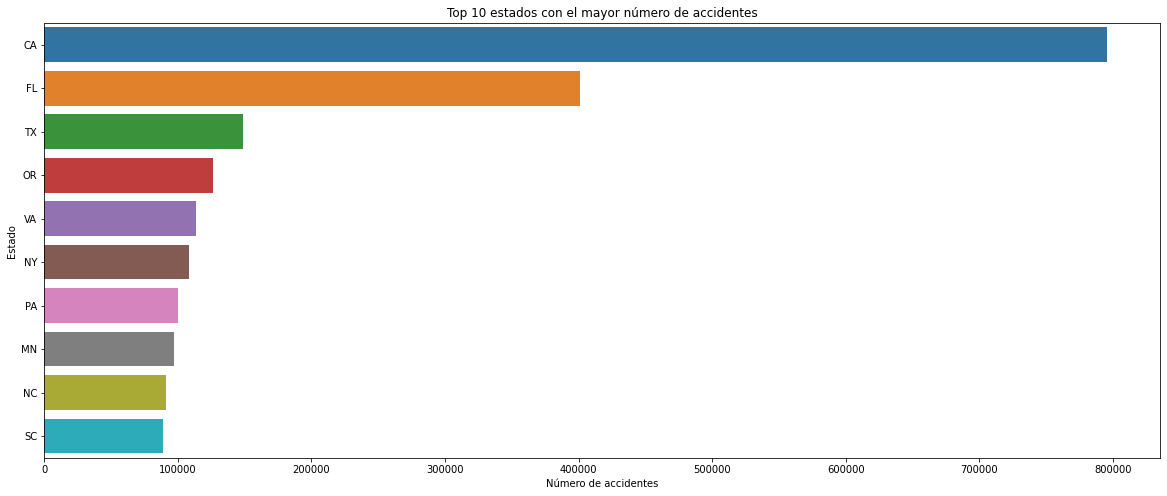

In [ ]:
plt.figure(figsize=(20, 8))
plt.title("Top 10 estados con el mayor número de accidentes")
sns.barplot(state_counts[:10].values, state_counts[:10].index, orient="h")
plt.xlabel("Número de accidentes")
plt.ylabel("Estado")
plt.show()

Como se explicó en la motivación, el dataset es referente a EEUU, por ende, el mapa explica de una mejor manera en qué estados hay una mayor cantidad de accidentes.

Acorde al gráfico, se puede observar que los 3 estados con más accidentes fueron California, Florida y Texas. Si bien esta información no es relevante para las problemáticas a abordar, sirve para entender el contexto.

### Explorando columnas <a name="EXColumnas"></a>

Si bien la exploración de columnas no aporta en el análisis que se realizará a la problemática, nos sirve para tener una idea de los datos únicos que se tratarán posteriormente.

In [ ]:
us_accident_unclean_unique_values = us_accident_unclean.nunique()
us_accident_unclean_unique_values

ID                       2845342
Severity                       4
Start_Time               1959333
End_Time                 2351505
Start_Lat                1093618
Start_Lng                1120365
End_Lat                  1080811
End_Lng                  1105404
Distance(mi)               14165
Description              1174563
Number                     46402
Street                    159651
Side                           3
City                       11681
County                      1707
State                         49
Zipcode                   363085
Country                        1
Timezone                       4
Airport_Code                2004
Weather_Timestamp         474214
Temperature(F)               788
Wind_Chill(F)                897
Humidity(%)                  100
Pressure(in)                1068
Visibility(mi)                76
Wind_Direction                24
Wind_Speed(mph)              136
Precipitation(in)            230
Weather_Condition            127
Amenity   

Al obtener los valores únicos de esta forma, es un poco dificil entender la cantidad de los datos, debido a esto, se graficarán los valores.

Text(0, 0.5, 'Columnas')

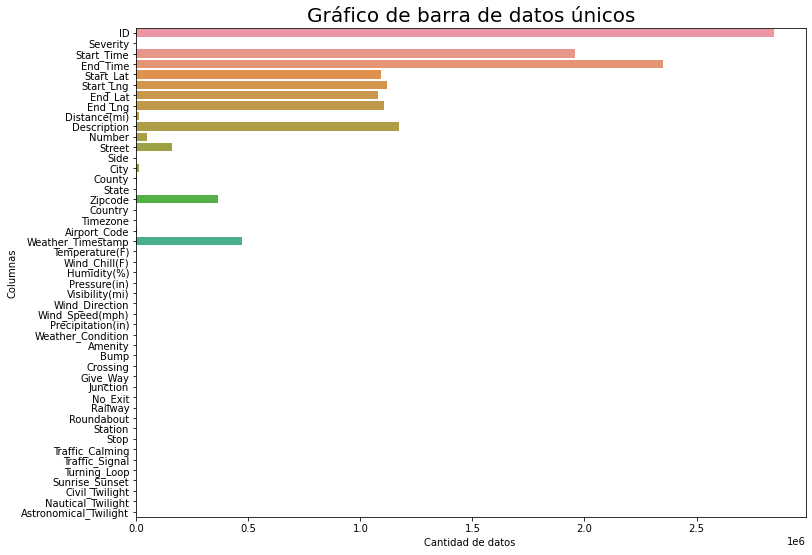

In [ ]:
plt.figure(figsize=(12,9))
sns.barplot(y=us_accident_unclean_unique_values.index, x=us_accident_unclean_unique_values)
plt.title("Gráfico de barra de datos únicos", size=20, color="black")
plt.xlabel('Cantidad de datos ')
plt.ylabel('Columnas')

Como las columnas 'Country' y 'Turning_Loop' solo tienen una clase, se decide eliminarlas.

In [ ]:
us_accident_clean = us_accident_unclean.drop(['Country', 'Turning_Loop'], axis=1)
us_accident_clean.head(3)

ID  Severity           Start_Time             End_Time  Start_Lat  \
0  A-1         3  2016-02-08 00:37:08  2016-02-08 06:37:08   40.10891   
1  A-2         2  2016-02-08 05:56:20  2016-02-08 11:56:20   39.86542   
2  A-3         2  2016-02-08 06:15:39  2016-02-08 12:15:39   39.10266   

   Start_Lng   End_Lat   End_Lng  Distance(mi)  \
0  -83.09286  40.11206 -83.03187         3.230   
1  -84.06280  39.86501 -84.04873         0.747   
2  -84.52468  39.10209 -84.52396         0.055   

                                         Description  ...  Railway Roundabout  \
0  Between Sawmill Rd/Exit 20 and OH-315/Olentang...  ...    False      False   
1                 At OH-4/OH-235/Exit 41 - Accident.  ...    False      False   
2                   At I-71/US-50/Exit 1 - Accident.  ...    False      False   

  Station   Stop Traffic_Calming Traffic_Signal Sunrise_Sunset Civil_Twilight  \
0   False  False           False          False          Night          Night   
1   False  False           False          False          Night          Night   
2   False  False           False          False          Night          Night   

  Nautical_Twilight Astronomical_Twilight  
0             Night                 Night  
1             Night                 Night  
2             Night                   Day  

[3 rows x 45 columns]

#### Correlación de los datos <a name="Correlación"></a>

A continuación, se analizará la matriz de correlación para poder tener una observación respecto a los datos que tienen demasiada correlación, que no nos aportan a la problemática a abordar.

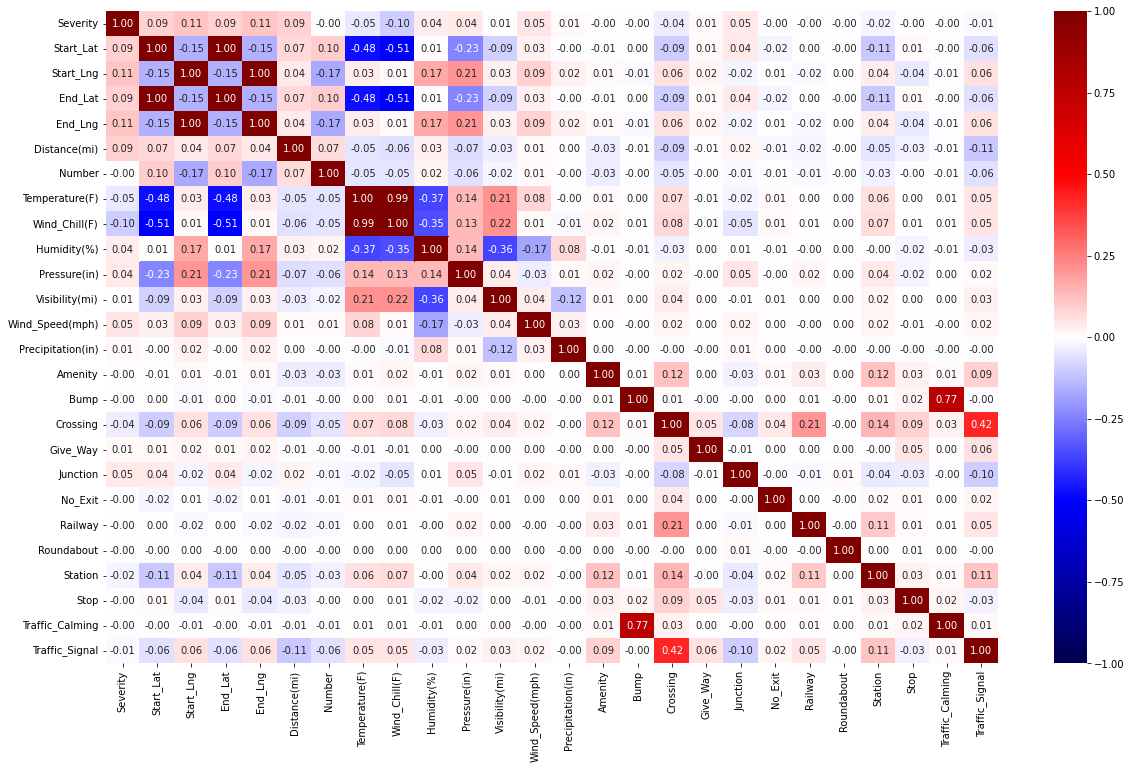

In [ ]:
corr_matrix = us_accident_clean.corr()

plt.figure(figsize=(20, 12))
sns.heatmap(corr_matrix, annot=True, vmin=-1, vmax=1, cmap="seismic", fmt=".2f")
plt.gca().patch.set(hatch="X", edgecolor="#666")
plt.show()

Como se puede observar en la matriz de correlación, existe una alta correlación entre los atributos: 
* Start_Lat y End_Lat (1.0)
* Start_Lng y End_Lng (1.0)
* Temperature y Wind Chill (0.99)

Al haber redundancia entre los atributos nombrados anteriormente, se decide eliminar End_Lat, End_Lng y Wind_Chill, las cuales, además, no aportan nada a las problemáticas propuestas.


In [ ]:
us_accident_clean = us_accident_clean.drop(['End_Lat','End_Lng','Wind_Chill(F)'], axis=1)


In [ ]:
us_accident_clean.head(3)

ID  Severity           Start_Time             End_Time  Start_Lat  \
0  A-1         3  2016-02-08 00:37:08  2016-02-08 06:37:08   40.10891   
1  A-2         2  2016-02-08 05:56:20  2016-02-08 11:56:20   39.86542   
2  A-3         2  2016-02-08 06:15:39  2016-02-08 12:15:39   39.10266   

   Start_Lng  Distance(mi)                                        Description  \
0  -83.09286         3.230  Between Sawmill Rd/Exit 20 and OH-315/Olentang...   
1  -84.06280         0.747                 At OH-4/OH-235/Exit 41 - Accident.   
2  -84.52468         0.055                   At I-71/US-50/Exit 1 - Accident.   

   Number       Street  ... Railway Roundabout Station   Stop Traffic_Calming  \
0     NaN  Outerbelt E  ...   False      False   False  False           False   
1     NaN       I-70 E  ...   False      False   False  False           False   
2     NaN       I-75 S  ...   False      False   False  False           False   

  Traffic_Signal Sunrise_Sunset Civil_Twilight  Nautical_Twilight  \
0          False          Night          Night              Night   
1          False          Night          Night              Night   
2          False          Night          Night              Night   

   Astronomical_Twilight  
0                  Night  
1                  Night  
2                    Day  

[3 rows x 42 columns]

Después de esta breve exploración, se procederá a explorar los atributos que tienen relación con las problemáticas a abordar.

#### Severity (Severidad) <a name="Severidad"></a>

Además de ser una de las problemáticas a abordar más adelante.<br>  La severidad del accidente es un número que varía entre los valores 1 y 4, donde 1 indica el menor impacto en el tráfico y 4, que indica un impacto significativo en el tráfico.


In [ ]:
us_accident_clean_severity = us_accident_clean["Severity"].value_counts()
us_accident_clean_severity

2    2532991
3     155105
4     131193
1      26053
Name: Severity, dtype: int64

Como se puede observar, el valor de la severidad que más está poblado es el número 2, lo que indica que la mayoría de accidentes no son de un impacto significativo, a continuación se graficarán los valores para tener un mejor entendimiento visual de éstos.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



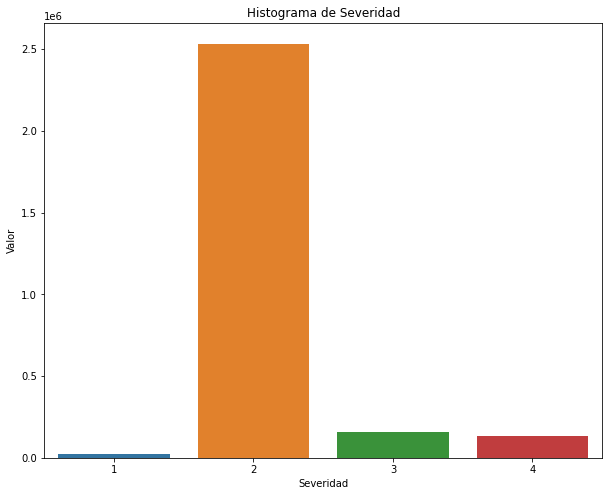

In [ ]:
plt.figure(figsize=(10,8))
plt.title("Histograma de Severidad")
sns.barplot(us_accident_clean_severity.index, us_accident_clean_severity.values)
plt.xlabel("Severidad")
plt.ylabel("Valor")
plt.show()

Podemos observar que la gran mayoría (2532991) de accidentes tienden a ser de severidad 2, lo cual nos habla de que es una clase desbalanceada. Por lo que, para poder tomarla en cuenta en el momento de abordar la problemática, se manejará de la forma que se describe en la (link md) propuesta metodológica experimental.

#### Wind_Direction <a name="Wind_Dir"></a>

La dirección del viento es una de las problemáticas a abordar para hacer un clasificado de accidentes, por ende, necesitaremos reagrupar los valores que tiene por defecto, como se verá a continuación.

In [ ]:
print("Wind Direction: ", us_accident_clean['Wind_Direction'].unique())

Wind Direction:  ['SW' 'Calm' 'WSW' 'WNW' 'West' 'NNW' 'South' 'W' 'NW' 'North' 'SSE' 'SSW'
 'ESE' 'SE' nan 'East' 'Variable' 'NNE' 'NE' 'ENE' 'CALM' 'S' 'VAR' 'N'
 'E']


Para simplificar la dirección del viento, se decide usar la nomenclatura de puntos cardinales N, NE, E, SE, S, SW, W, NW, además de reemplazar la variable 'variable' como VAR.

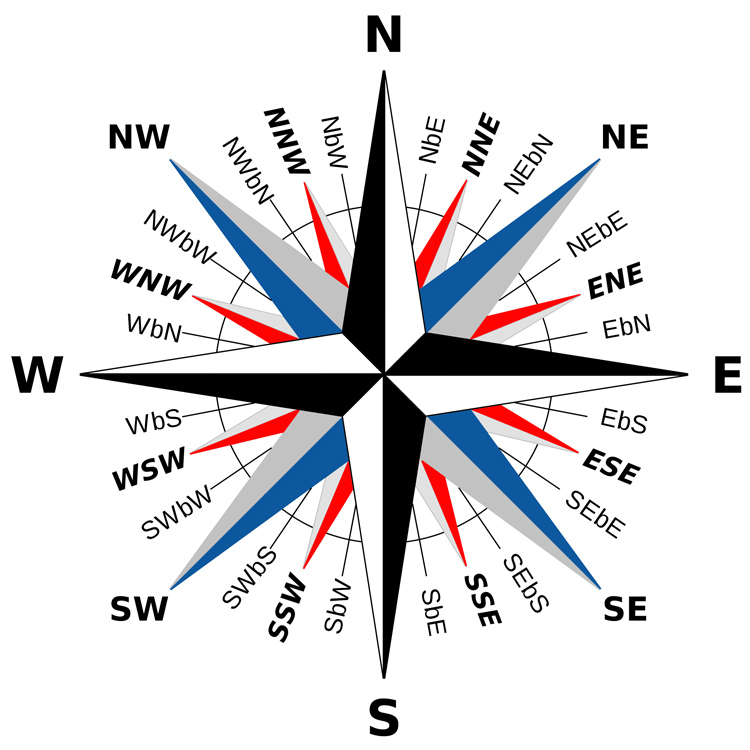

In [ ]:
us_accident_clean.loc[us_accident_clean['Wind_Direction']=='Calm','Wind_Direction'] = 'CALM'
us_accident_clean.loc[(us_accident_clean['Wind_Direction']=='West')|(us_accident_clean['Wind_Direction']=='WSW')|(us_accident_clean['Wind_Direction']=='WNW'),'Wind_Direction'] = 'W'
us_accident_clean.loc[(us_accident_clean['Wind_Direction']=='South')|(us_accident_clean['Wind_Direction']=='SSW')|(us_accident_clean['Wind_Direction']=='SSE'),'Wind_Direction'] = 'S'
us_accident_clean.loc[(us_accident_clean['Wind_Direction']=='North')|(us_accident_clean['Wind_Direction']=='NNW')|(us_accident_clean['Wind_Direction']=='NNE'),'Wind_Direction'] = 'N'
us_accident_clean.loc[(us_accident_clean['Wind_Direction']=='East')|(us_accident_clean['Wind_Direction']=='ESE')|(us_accident_clean['Wind_Direction']=='ENE'),'Wind_Direction'] = 'E'
us_accident_clean.loc[us_accident_clean['Wind_Direction']=='Variable','Wind_Direction'] = 'VAR'
print("Wind Direction después de la simplificación: ", us_accident_clean['Wind_Direction'].unique())

Wind Direction después de la simplificación:  ['SW' 'CALM' 'W' 'N' 'S' 'NW' 'E' 'SE' nan 'VAR' 'NE']


#### Weather_Condition <a name="Weather_Cond"></a>

La condición del clima es otra de las problemáticas a abordar más adelante, al igual que la dirección del viento, al ser tantos valores los que se encuentran, necesitamos reagrupar los valores que sean parecidos.<br>
Estos valores serán Clear, Cloud, Rain, Heavy_Rain, Snow, Heavy_Snow y Fog.

In [ ]:
us_accident_clean["Weather_Condition"].value_counts()

Fair                        1107194
Mostly Cloudy                363959
Cloudy                       348767
Partly Cloudy                249939
Clear                        173823
                             ...   
Sleet / Windy                     1
Mist / Windy                      1
Blowing Sand                      1
Heavy Freezing Rain               1
Thunder and Hail / Windy          1
Name: Weather_Condition, Length: 127, dtype: int64

In [ ]:
us_accident_clean.loc[us_accident_clean["Weather_Condition"].str.contains("Thunder|T-Storm", na=False), "Weather_Condition"] = "Thunderstorm"
us_accident_clean.loc[us_accident_clean["Weather_Condition"].str.contains("Snow|Sleet|Wintry", na=False), "Weather_Condition"] = "Snow"
us_accident_clean.loc[us_accident_clean["Weather_Condition"].str.contains("Rain|Drizzle|Shower", na=False), "Weather_Condition"] = "Rain"
us_accident_clean.loc[us_accident_clean["Weather_Condition"].str.contains("Wind|Squalls", na=False), "Weather_Condition"] = "Windy"
us_accident_clean.loc[us_accident_clean["Weather_Condition"].str.contains("Hail|Pellets", na=False), "Weather_Condition"] = "Hail"
us_accident_clean.loc[us_accident_clean["Weather_Condition"].str.contains("Fair", na=False), "Weather_Condition"] = "Clear"
us_accident_clean.loc[us_accident_clean["Weather_Condition"].str.contains("Cloud|Overcast", na=False), "Weather_Condition"] = "Cloudy"
us_accident_clean.loc[us_accident_clean["Weather_Condition"].str.contains("Mist|Haze|Fog", na=False), "Weather_Condition"] = "Fog"
us_accident_clean.loc[us_accident_clean["Weather_Condition"].str.contains("Sand|Dust", na=False), "Weather_Condition"] = "Sand"
us_accident_clean.loc[us_accident_clean["Weather_Condition"].str.contains("Smoke|Volcanic Ash", na=False), "Weather_Condition"] = "Smoke"
us_accident_clean.loc[us_accident_clean["Weather_Condition"].str.contains("N/A Precipitation", na=False), "Weather_Condition"] = np.nan

print("Weather Condition después de la simplificación: ", us_accident_clean["Weather_Condition"].unique())


Weather Condition después de la simplificación:  ['Rain' 'Cloudy' 'Snow' nan 'Clear' 'Fog' 'Thunderstorm' 'Smoke' 'Windy'
 'Hail' 'Sand' 'Tornado']


In [ ]:
us_accident_clean.head(3)

ID  Severity           Start_Time             End_Time  Start_Lat  \
0  A-1         3  2016-02-08 00:37:08  2016-02-08 06:37:08   40.10891   
1  A-2         2  2016-02-08 05:56:20  2016-02-08 11:56:20   39.86542   
2  A-3         2  2016-02-08 06:15:39  2016-02-08 12:15:39   39.10266   

   Start_Lng  Distance(mi)                                        Description  \
0  -83.09286         3.230  Between Sawmill Rd/Exit 20 and OH-315/Olentang...   
1  -84.06280         0.747                 At OH-4/OH-235/Exit 41 - Accident.   
2  -84.52468         0.055                   At I-71/US-50/Exit 1 - Accident.   

   Number       Street  ... Railway Roundabout Station   Stop Traffic_Calming  \
0     NaN  Outerbelt E  ...   False      False   False  False           False   
1     NaN       I-70 E  ...   False      False   False  False           False   
2     NaN       I-75 S  ...   False      False   False  False           False   

  Traffic_Signal Sunrise_Sunset Civil_Twilight  Nautical_Twilight  \
0          False          Night          Night              Night   
1          False          Night          Night              Night   
2          False          Night          Night              Night   

   Astronomical_Twilight  
0                  Night  
1                  Night  
2                    Day  

[3 rows x 42 columns]

Después de realizar la agrupación de los valores similares, se paso de un total de 127 a 11 valores únicos, permitiendo optimizar el proceso de análisis al momento de implementar los modelos de clasificación.

#### Wind_Speed <a name="Wind_Speed"></a>

Wind_Speed hace referencia a la velocidad del viento y es un atributo que cobra importancia para la problemática 2 a trabajar.

In [ ]:
us_accident_clean["Wind_Speed(mph)"].describe()

count    2.687398e+06
mean     7.395044e+00
std      5.527454e+00
min      0.000000e+00
25%      3.500000e+00
50%      7.000000e+00
75%      1.000000e+01
max      1.087000e+03
Name: Wind_Speed(mph), dtype: float64

Podemos ver que la mediana de los datos se situa en 7.3, el promedio en 8.1, sin embargo el valor máximo es 984, lo cual  lleva a sospechar la precencia de outliers.

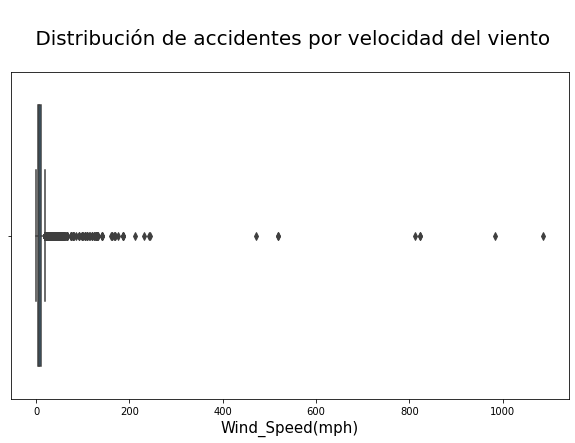

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
plt.title('\n Distribución de accidentes por velocidad del viento\n', size=20)
plt.xlabel('\n Wind_Speed\n', fontsize=15)
sns.boxplot(x=us_accident_clean["Wind_Speed(mph)"])

Luego de graficar un boxplot de Wind_Speed, se observa que existe gran cantidad de outliers.

#### Pressure <a name="Pressure"></a>

La presión atmosférica es otro de los atributos que cobra relevancia para la problemática a trabajar.

In [ ]:
us_accident_clean["Pressure(in)"].describe()

count    2.786142e+06
mean     2.947234e+01
std      1.045286e+00
min      0.000000e+00
25%      2.931000e+01
50%      2.982000e+01
75%      3.001000e+01
max      5.890000e+01
Name: Pressure(in), dtype: float64

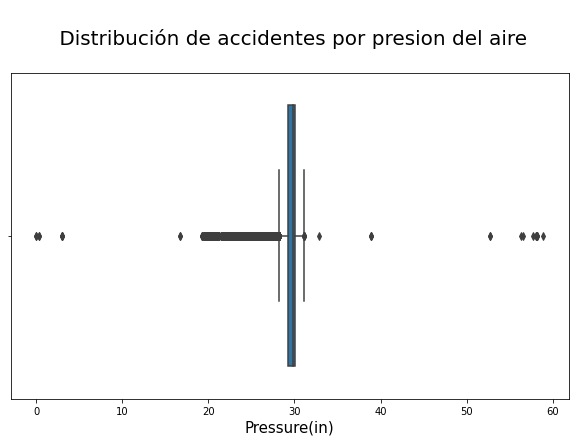

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
plt.title('\n Distribución de accidentes por presion del aire\n', size=20)
plt.xlabel('\n Visibility(mi)\n', fontsize=15)
sns.boxplot(x=us_accident_clean["Pressure(in)"])

Luego de graficar un boxplot de Pressure, se observa que la gran mayoría de los datos se encuentras agrupados entre 28 y 31, aproximadamente. Se puede ver gran cantidad de outliers.

#### Humidity <a name="Humidity"></a>

La humedad ambiental es otro de los atributos considerados para la problemática a trabajar.

In [ ]:
us_accident_clean["Humidity(%)"].describe()

count    2.772250e+06
mean     6.436545e+01
std      2.287457e+01
min      1.000000e+00
25%      4.800000e+01
50%      6.700000e+01
75%      8.300000e+01
max      1.000000e+02
Name: Humidity(%), dtype: float64

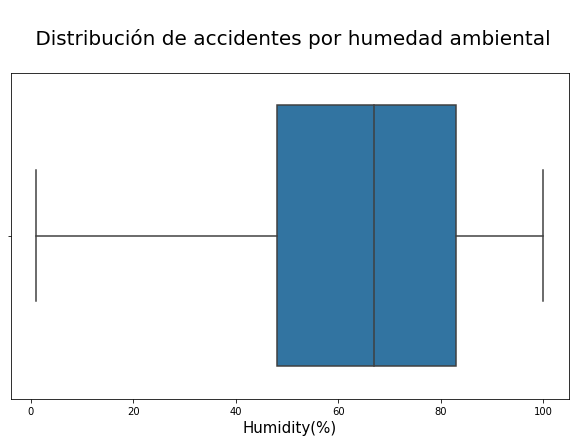

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
plt.title('\n Distribución de accidentes por humedad ambiental\n', size=20)
plt.xlabel('\n Visibility(mi)\n', fontsize=15)
sns.boxplot(x=us_accident_clean["Humidity(%)"])

Luego de graficar un boxplot de Humidity, se observa que la mediana está en torno a 64 y que no existe presencia de outliers.

## Preguntas y problemas <a name="Preguntas"></a>

Como se mencionó durante la exploración inicial, las problemáticas a abordar tratan acerca de la severidad de un accidente, teniendo en cuenta cierto atributos explorados anteriormente. <br> A continuación se detallarán las correspondientes problemáticas:

#### Problemática 1 <a name="prob-1"></a>

El primer problema de clasificación a abordar es el clasificar la severidad de un accidente asociando a la condición climática que hubo. <br> Para abordar este problema, hemos decidido aplicar el modelo de clasificación 'Decision Tree' y 'KNN'. Esta decisión es debido a que se compararán las métricas simliares que nos entregan estos modelos para ver cuál es la que se adapta mejor a las necesidades.

#### Problemática 2 <a name="prob-2"></a>

El segundo problema de clasificación a abordar es el de clasificar que tan severo fue un accidente, tomando como valores la dirección del viento, velocidad del viento, presión y humedad ambiental. <br> Para abordar este problema, hemos decidido aplicar el modelo de clasificación 'SVM' y 'K-means'.

La razón de por qué la utilización de estos modelos, es debido a que se compararán en base a las métricas vistas en clases, poniendo especial enfasis en Recall, pues nos interesa maximizar el número de accidentes de un determinado tipo que son efectivamente catalogados de ese tipo.


#### Problemática 3 <a name="prob-3"></a>

El tercer y último problema de clasificación a abordar es el de clasificar la severidad de un accidente tomando en cuenta todos los atributos que se puedan reemplazar por valores cuantitativos. <br> Para abordar este problema, decidimos aplicar modelos de clasificación como:

*   Árbol de decisión
*   Support Vector Machine
*   Naive Bayes

La razón de por qué la utilización de estos modelos, es debido a que se compararán las métricas similares que nos entregan.



## Propuesta metodológica experimental <a name="Propuesta"></a>

#### Propuesta metodológica experimental problemática 1 <a name="prop-met-exp-1"></a>

Para responder la problemática orientada a la clasificación de un accidente asociado al tipo de clima que hubo al momento de la colisión, se implementarán dos modelos de clasificación supervisada, principalmente se aplicarán los modelos de clasificación 'Decision tree' y 'KNN'. Para implementar, se deben distinguir las variables predictivas a las variables a predecir. 

* Las variables predictivas se obtendrán de la columna “Weather_Condition”.
* Las variables por predecir se obtendrán de la columna “Severity”.
<br>

En el caso de la columna Weather_Condition, esta es de tipo objeto y contiene un total de 11 valores únicos después de hacer la agrupación de conceptos parecidos, en donde se encuentran rain, snow, thunderstorm, fog, etc. Pero como se necesita que el valor sea numérico, se debe realizar un dumies en Weather_Condition para reemplazar y crear columnas nuevas con valores 0 y 1.

Ahora, se deben asignar las nuevas variables predictivas de las columnas, excepto la ‘Severity’.

Siempre que implementamos un modelo predictivo necesitamos dividir los datos en dos partes, uno de entrenamiento para crear el modelo y otra de prueba para ver qué tan bueno es éste. En esta ocasión se utilizará un 75% en el entrenamiento y un 25% en la prueba, se utilizará la librería train_test_split para realizar lo anteriormente mencionado. 

Luego se realiza el modelo del árbol de decisión, donde se pasa los parámetros de las variables predictoras y las variables a predecir. Con la librería tree se creará el gráfico del árbol de decisión donde detallará el resultado. Para calcular la precisión del modelo, se puede implementar una matriz de confusión, con la librería confusión_matrix y la función de confusión matrix, nos mostraría los resultados luego de ingresar los parámetros de los valores reales de las clases y los valores de predicción, en el caso que se desee calcular una precisión global del modelo se puede usar la librería numpy, sumando los valores correctamente predichos(los que se encuentran en la diagonal de la matriz de confusión), dividido por la suma de todos los valores de la matriz. 

Dado que deseamos predecir la gravedad del accidente por las condiciones climáticas, utilizaremos la métrica Recall, porque considera los falsos negativos, estos serían accidentes de baja severidad en malas condiciones climáticas. Esperaríamos que el resultado sea lo más cercano a 1, dado que necesitamos una exactitud alta, para evitar los accidentes graves en condiciones específicas que entregue el modelo.

También, se comparará con el modelo KNN, siendo éste un clasificador de aprendizaje supervisado no paramétrico, que utiliza la proximidad para hacer clasificaciones o predicciones sobre la agrupación de un punto de datos individuales. Se debe asignar el valor de K al clasificador para que el modelo sepa cuantos vecinos se tomaran en cuenta. Se puede realizar gráficos para visualizar todas las agrupaciones resultantes y hacer pruebas con un valor aleatorio para deducir la severidad del accidente que pertenece.
 Para ver si nos entrega mejores resultados en la clasificación, principalmente se observará el valor del Recall, ya que su resultado se obtiene de los verdaderos positivos y los falsos negativos, en el caso de que nos diera un resultado de mayor exactitud que el Decision Tree, nos quedaríamos con el modelo KNN.


La exactitud hace referencia al valor más cercano a 1 en Recall de los modelos nombrados anteriormente.




#### Propuesta metodológica experimental problemática 2 <a name="prop-met-exp-2"></a>

Para responder la problemática orientada a la clasificación de la severidad de un accidente, basandonos en la dirección del viento, velocidad del viento, presión atmosférica y humedad ambiental, se implementará un modelo de clasificación supervisada, siendo los algoritmo escogido para esta tarea Support Vector Machine (SVM) y K-Means, los cuales serán comparados, cómo ya se dijo, en todas las métricas vistas en clases, poniendo especial énfasis en Recall. 


Respecto a los modelos:

* En cuanto a SVM se usará una estrategia "one vs rest" donde la clasificación de cada una de las posibles clases (Severidad; de 1 a 4) es considerado un problema binario independiente para cada una de las posibles clases.
  
  Para su implementación se utilizará la libretía scikit-learn la cual provee un método OneVsRestClassifier en el paquete multiclass, lo cual nos ahorrará tener que programar cada problema binario por separado, pues la librería se encargará de ello. 

* En cuanto a K-means se utilizará tambien la librería scikit-learn la cual provee un método Kmeans en el paquete clusters.

Respecto a los atributos:

* Para la dirección del viento se utilizaran datos dummie. Siendo estas N, NE, E, SE, S, SW, W, NW y VAR, se reemplazaran por números del 1 al 9.

* Para los atributos elegidos en general, habrá que encargarse de los outliers y valores na.

Como en el problema anterior, nos parece sensato utilizar el 75% de los datos para entrenar el modelo y un 25% para testearlo.

#### Propuesta metodológica experimental problemática 3 <a name="prop-met-exp-3"></a>

Para responder la problemática orientada a la clasificación de la severidad de un accidente, se implementará un modelo de clasificación supervisada. Se hará de esta manera, ya que se busca que el modelo aprenda los patrones presente en los datos, con el fin de predecir la severidad de un accidente en distintos datasets con atributos similares.
<br>
En cuanto a los modelos que se probarán en el dataset, se optarán por:


*   Árbol de decisión
*   Naive Bayes
*   Support Vector Machine

El por qué del uso de estos modelos de clasificación es debido a que compararemos las métricas similares que éstos entregan. Evaluaremos el f1-score, accuracy, recall y precision.

Además, como se mencionó en la exploración de los datos, se tendrá que balancear los datos del atributo "Severity" para poder tener una mejor clasificación.
Para esto, se realizará *undersampling* del atributo "Severity". <br>Creemos que es una buena opción porque nos dejaría una cantidad de aproximadamente 25k de registros por cada categoría (por lo que se observó anteriormente en la exploración de este atributo).
<br>También, se tendrá que crear un nuevo dataframe con datos cuantitativos para el correcto uso de los modelos de clasificación, se deberá convertir todos los datos de los atributos en datos cuantitativos. <br>Para esto, se tendrá que hacer las siguientes transformaciones: 


*   Agregar valores a atributos que no tengan datos registrados, o valores NaN. Por ejemplo, en la temperatura, reemplazar los valores NaN por la media de los valores totales.
*   Reemplazar valores booleanos verdadero, falso, por valores 1, 0 respectivamente.  


## Resultado preliminar propuesta metodológica experimental 3 <a name="Resultado_Pre_1"></a>

#### Atributos a eliminar <a name="Atributos_Eliminar"></a>

Los atributos que decidimos a eliminar debido a que no aportan en la problemática abordada son:

*  Id: No tienen información alguna, decidimos eliminarlo. 
*  Start_Time: No aporta en la problemática, decidimos eliminarlo.
*  City: No aporta en la problemática, decidimos eliminarlo.
*  End_Time: No aporta en la problemática, decidimos eliminarlo.
*  Description: Por simplicidad, decidimos eliminarlo.
*  Street: No nos estamos enfocando en la ciudad donde fue el accidente, decidimos eliminarlo.
*  Number: No nos estamos enfocando en la ciudad donde fue el accidente, decidimos eliminarlo.
*  State: No nos estamos enfocando en la ciudad donde fue el accidente, decidimos eliminarlo.
*  Zipcode: No nos estamos enfocando en la ciudad donde fue el accidente, decidimos eliminarlo.
*  Timezone: No aporta en la problemática, decidimos eliminarlo.
*  Airport_Code: No aporta en la problemática, decidimos eliminarlo.
*  Weather_Timestamp: No aporta en la problemática, decidimos eliminarlo.
*  Turning_Loop: Siempre es falso, decidimos eliminarlo.
*  Sunrise_Sunset: Datos redundantes, decidimos eliminarlo.
*  Nautical_Twilight: Datos redundantes, decidimos eliminarlo.
*  Astronomical_Twilight: Datos redundantes, decidimos eliminarlo.



In [ ]:
attributes_to_drop = ["ID", "Start_Time", "City", "Number", "End_Time", "Description", "Street", 
                      "County", "State", "Zipcode", "Timezone", "Airport_Code", 
                      "Weather_Timestamp", "Sunrise_Sunset", "Nautical_Twilight", "Astronomical_Twilight"]
us_accident_clean = us_accident_clean.drop(attributes_to_drop, axis=1)
us_accident_clean.head(3)


Severity  Start_Lat  Start_Lng  Distance(mi) Side  Temperature(F)  \
0         3   40.10891  -83.09286         3.230    R            42.1   
1         2   39.86542  -84.06280         0.747    R            36.9   
2         2   39.10266  -84.52468         0.055    R            36.0   

   Humidity(%)  Pressure(in)  Visibility(mi) Wind_Direction  ...  Give_Way  \
0         58.0         29.76            10.0             SW  ...     False   
1         91.0         29.68            10.0           CALM  ...     False   
2         97.0         29.70            10.0           CALM  ...     False   

   Junction No_Exit  Railway  Roundabout  Station   Stop  Traffic_Calming  \
0     False   False    False       False    False  False            False   
1     False   False    False       False    False  False            False   
2      True   False    False       False    False  False            False   

   Traffic_Signal  Civil_Twilight  
0           False           Night  
1           False           Night  
2           False           Night  

[3 rows x 26 columns]

In [ ]:
print("Las dimensiones del dataset son: ",(us_accident_clean.shape))

Las dimensiones del dataset son:  (2845342, 26)


Una vez teniendo el dataset más reducido, se procederá a establecer las categorías categóricas, las cuales serían Side, City, Wind_Direction, Weather_Condition y Civil_Twilight

In [ ]:
categorical_features = set(["Side", "Wind_Direction", "Weather_Condition", "Civil_Twilight"])

for i in categorical_features:
    us_accident_clean[i] = us_accident_clean[i].astype("category")

us_accident_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 26 columns):
 #   Column             Dtype   
---  ------             -----   
 0   Severity           int64   
 1   Start_Lat          float64 
 2   Start_Lng          float64 
 3   Distance(mi)       float64 
 4   Side               category
 5   Temperature(F)     float64 
 6   Humidity(%)        float64 
 7   Pressure(in)       float64 
 8   Visibility(mi)     float64 
 9   Wind_Direction     category
 10  Wind_Speed(mph)    float64 
 11  Precipitation(in)  float64 
 12  Weather_Condition  category
 13  Amenity            bool    
 14  Bump               bool    
 15  Crossing           bool    
 16  Give_Way           bool    
 17  Junction           bool    
 18  No_Exit            bool    
 19  Railway            bool    
 20  Roundabout         bool    
 21  Station            bool    
 22  Stop               bool    
 23  Traffic_Calming    bool    
 24  Traffic_Signal     bool 

Como se puede observar, contamos con distintos tipos de valores, booleanos, float e integers. Producto a lo realizado, ahora contamos con un tipo categórico.
<br>
A continuación, se procederá a convertir los valores booleanos a valores cuantitativos

In [ ]:
us_accident_clean = us_accident_clean.replace([True, False], [1,0])
us_accident_clean.head(3)

Severity  Start_Lat  Start_Lng  Distance(mi) Side  Temperature(F)  \
0         3   40.10891  -83.09286         3.230    R            42.1   
1         2   39.86542  -84.06280         0.747    R            36.9   
2         2   39.10266  -84.52468         0.055    R            36.0   

   Humidity(%)  Pressure(in)  Visibility(mi) Wind_Direction  ...  Give_Way  \
0         58.0         29.76            10.0             SW  ...         0   
1         91.0         29.68            10.0           CALM  ...         0   
2         97.0         29.70            10.0           CALM  ...         0   

   Junction No_Exit  Railway  Roundabout  Station  Stop  Traffic_Calming  \
0         0       0        0           0        0     0                0   
1         0       0        0           0        0     0                0   
2         1       0        0           0        0     0                0   

   Traffic_Signal  Civil_Twilight  
0               0           Night  
1               0           Night  
2               0           Night  

[3 rows x 26 columns]

Luego, se utilizara la propiedad get_dummies(), la cual nos convertirá las variables categóricas a variables dummies, para poder convertirlos a datos cuantitativos.

In [ ]:
onehot_cols = categorical_features

us_accident_clean = pd.get_dummies(us_accident_clean, columns=onehot_cols, drop_first=True)

us_accident_clean.head(3)

Severity  Start_Lat  Start_Lng  Distance(mi)  Temperature(F)  Humidity(%)  \
0         3   40.10891  -83.09286         3.230            42.1         58.0   
1         2   39.86542  -84.06280         0.747            36.9         91.0   
2         2   39.10266  -84.52468         0.055            36.0         97.0   

   Pressure(in)  Visibility(mi)  Wind_Speed(mph)  Precipitation(in)  ...  \
0         29.76            10.0             10.4               0.00  ...   
1         29.68            10.0              NaN               0.02  ...   
2         29.70            10.0              NaN               0.02  ...   

   Weather_Condition_Cloudy  Weather_Condition_Fog  Weather_Condition_Hail  \
0                         0                      0                       0   
1                         0                      0                       0   
2                         1                      0                       0   

   Weather_Condition_Rain  Weather_Condition_Sand  Weather_Condition_Smoke  \
0                       1                       0                        0   
1                       1                       0                        0   
2                       0                       0                        0   

   Weather_Condition_Snow  Weather_Condition_Thunderstorm  \
0                       0                               0   
1                       0                               0   
2                       0                               0   

   Weather_Condition_Tornado  Weather_Condition_Windy  
0                          0                        0  
1                          0                        0  
2                          0                        0  

[3 rows x 44 columns]

Como se puede observar en las filas, en ciertas columnas quedan valores NaN, los cuales nos darán problema para poder usar modelos de clasificación. Por ende, decidimos convertir los valores NaN a medias de los datos totales de cada columna.
<br>En este caso, las columnas que tienen valores NaN son Temperature, Humidity, Pressure, Visibility, Wind_Speed y Precipitation.

In [ ]:
features_to_fill = ["Temperature(F)", "Humidity(%)", "Pressure(in)", "Visibility(mi)", "Wind_Speed(mph)", "Precipitation(in)"]
us_accident_clean[features_to_fill] = us_accident_clean[features_to_fill].fillna(us_accident_clean[features_to_fill].mean())

us_accident_clean.dropna(inplace=True)

us_accident_clean.isna().sum()

Severity                          0
Start_Lat                         0
Start_Lng                         0
Distance(mi)                      0
Temperature(F)                    0
Humidity(%)                       0
Pressure(in)                      0
Visibility(mi)                    0
Wind_Speed(mph)                   0
Precipitation(in)                 0
Amenity                           0
Bump                              0
Crossing                          0
Give_Way                          0
Junction                          0
No_Exit                           0
Railway                           0
Roundabout                        0
Station                           0
Stop                              0
Traffic_Calming                   0
Traffic_Signal                    0
Wind_Direction_E                  0
Wind_Direction_N                  0
Wind_Direction_NE                 0
Wind_Direction_NW                 0
Wind_Direction_S                  0
Wind_Direction_SE           

In [ ]:
us_accident_clean.head(3)

Severity  Start_Lat  Start_Lng  Distance(mi)  Temperature(F)  Humidity(%)  \
0         3   40.10891  -83.09286         3.230            42.1         58.0   
1         2   39.86542  -84.06280         0.747            36.9         91.0   
2         2   39.10266  -84.52468         0.055            36.0         97.0   

   Pressure(in)  Visibility(mi)  Wind_Speed(mph)  Precipitation(in)  ...  \
0         29.76            10.0        10.400000               0.00  ...   
1         29.68            10.0         7.395044               0.02  ...   
2         29.70            10.0         7.395044               0.02  ...   

   Weather_Condition_Cloudy  Weather_Condition_Fog  Weather_Condition_Hail  \
0                         0                      0                       0   
1                         0                      0                       0   
2                         1                      0                       0   

   Weather_Condition_Rain  Weather_Condition_Sand  Weather_Condition_Smoke  \
0                       1                       0                        0   
1                       1                       0                        0   
2                       0                       0                        0   

   Weather_Condition_Snow  Weather_Condition_Thunderstorm  \
0                       0                               0   
1                       0                               0   
2                       0                               0   

   Weather_Condition_Tornado  Weather_Condition_Windy  
0                          0                        0  
1                          0                        0  
2                          0                        0  

[3 rows x 44 columns]

#### Undersampling a Severity <a name="Undersampling"></a>

Como se definió en la propuesta metodológica experimental, se aplicará undersampling a la clase severity. Para esto, se recorrerá la clase y se reemplazarán los valores de todos las columnas menos la de valor 1 (que es la de menor cantidad de datos). Realizando esto, se esperaría tener la clase balanceada a aprox 25k de datos en cada columna.

In [ ]:
size = len(us_accident_clean[us_accident_clean["Severity"]==1].index)
df = pd.DataFrame()
for i in range(1,5):
    S = us_accident_clean[us_accident_clean["Severity"]==i]
    df = df.append(S.sample(size, random_state=42))
us_accident_clean = df

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



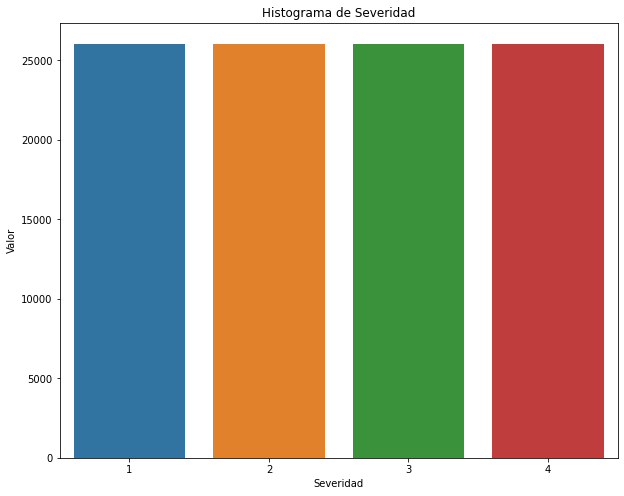

In [ ]:
us_accident_clean_severity_undersampling = us_accident_clean["Severity"].value_counts()

plt.figure(figsize=(10, 8))
plt.title("Histograma de Severidad")
sns.barplot(us_accident_clean_severity_undersampling.index, us_accident_clean_severity_undersampling.values)
plt.xlabel("Severidad")
plt.ylabel("Valor")
plt.show()

#### Decision Tree <a name="Decision_Tree"></a>

In [ ]:
sample = us_accident_clean
y_sample = sample["Severity"]
X_sample = sample.drop("Severity", axis=1)

X_train, X_validate, y_train, y_validate = train_test_split(X_sample, y_sample, random_state=42)

print(X_train.shape, y_train.shape)
print(X_validate.shape, y_validate.shape)

(78159, 43) (78159,)
(26053, 43) (26053,)


In [ ]:
modelo_arbol = DecisionTreeClassifier(max_depth=3)
modelo_arbol_entrenado = modelo_arbol.fit(X_sample, y_sample)
y_pred = modelo_arbol.predict(X_validate)
 
print("Predicción")
print(classification_report(y_train, modelo_arbol.predict(X_train)))
print("Validación")
print(classification_report(y_validate, y_pred))

Predicción
              precision    recall  f1-score   support

           1       0.77      0.81      0.79     19577
           2       0.56      0.44      0.49     19396
           3       0.48      0.65      0.55     19458
           4       0.46      0.38      0.42     19728

    accuracy                           0.57     78159
   macro avg       0.57      0.57      0.56     78159
weighted avg       0.57      0.57      0.56     78159

Validación
              precision    recall  f1-score   support

           1       0.76      0.80      0.78      6476
           2       0.57      0.43      0.49      6657
           3       0.48      0.66      0.56      6595
           4       0.46      0.38      0.42      6325

    accuracy                           0.57     26053
   macro avg       0.57      0.57      0.56     26053
weighted avg       0.57      0.57      0.56     26053



Podemos observar, respecto a precisión, que el modelo tiene sobre el 70% de probabilidad de acertar correctamente cuando da como resultado severidad 1 y el resto de severidades alrededor del 50%. Por otra parte, respecto a recall, vemos que fue capaz de clasificar correctamente el 81% de los datos que eran severidad 1, 44% para severidad 2, 65% para severidad 3 y solo 38% para severidad 4. La f1-score, que mezcla ambas métricas nos arroja un valor de 79% para severidad 1 y valores que rondan el 50% para el resto de severidades. Finalmente, en cuanto a accuracy, el modelo fue capaz de predecir correctamente el 57% de los datos. 

#### Naive Bayes <a name="Naïve"></a>

In [ ]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_validate) 

print("Predicción")
print(classification_report(y_train, gnb.predict(X_train)))
print("Validación")
print(classification_report(y_validate, y_pred))

Predicción
              precision    recall  f1-score   support

           1       0.49      0.58      0.53     19577
           2       0.49      0.01      0.03     19396
           3       0.41      0.07      0.12     19458
           4       0.31      0.81      0.45     19728

    accuracy                           0.37     78159
   macro avg       0.42      0.37      0.28     78159
weighted avg       0.42      0.37      0.28     78159

Validación
              precision    recall  f1-score   support

           1       0.48      0.59      0.53      6476
           2       0.56      0.01      0.03      6657
           3       0.42      0.07      0.12      6595
           4       0.30      0.80      0.44      6325

    accuracy                           0.36     26053
   macro avg       0.44      0.37      0.28     26053
weighted avg       0.44      0.36      0.28     26053



Podemos observar, respecto a precisión, que el modelo tiene un 49% de probabilidad de acertar cuando da como resultado severidad 1 y 2, sin embargo decae a alrededor del 40% para la severidad 3 y 4. Por otra parte, respecto a recall, vemos que fue capaz de clasificar correctamente el 53% de los datos que eran severidad 1 y un 45% para severidad 4, sin embargo esta métrica se desploma con la severidad 2 y 3. La f1-score nos arroja un valor de alrededor del 50% para severidad 1 y 4, pero vuelve a desplomarce para severidad 2 y 3. Finalmente, en cuanto a accuracy, el modelo fue capaz de predecir correctamente solo el 37% de los datos.
En terminos generales podemos decir que este modelo se desempeñó peor que el modelo anterior.

#### Support Vector Machine <a name="SVM"></a>

In [ ]:
modelo_SVM = LinearSVC(random_state=0, tol=1e-5, max_iter=1000) 
modelo_entrenado_SVM = modelo_SVM.fit(X_train,y_train)
y_pred = modelo_SVM.predict(X_validate)

print("Predicción")
print(classification_report(y_train, modelo_SVM.predict(X_train)))
print("Validación")
print(classification_report(y_validate, y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Predicción
              precision    recall  f1-score   support

           1       0.28      0.92      0.43     19577
           2       0.28      0.20      0.23     19396
           3       0.62      0.00      0.00     19458
           4       0.74      0.01      0.03     19728

    accuracy                           0.28     78159
   macro avg       0.48      0.28      0.17     78159
weighted avg       0.48      0.28      0.17     78159

Validación
              precision    recall  f1-score   support

           1       0.28      0.92      0.43      6476
           2       0.29      0.19      0.23      6657
           3       0.50      0.00      0.00      6595
           4       0.71      0.01      0.03      6325

    accuracy                           0.28     26053
   macro avg       0.45      0.28      0.17     26053
weighted avg       0.44      0.28      0.17     26053



Podemos observar, respecto a precisión, que el modelo tiene un 74% de probabilidad de acertar cuando da como resultado de la clasificación la severidad 4 y un 62% para la severidad 3, sin embargo decae a alrededor del 28% para la severidad 1 y 2. Por otra parte, respecto a recall, vemos que fue capaz de clasificar correctamente el 92% de los datos que eran severidad 1, sin embargo esta métrica se desploma para todas las otras severidades. Respecto a la f1-score, ningún valor sobrepasa el 50% y el desempeño es extremadamente malo al momento de clasificar la severidad 3 y 4. Finalmente, en cuanto a accuracy, el modelo fue capaz de predecir correctamente solo el 28% de los datos.
En terminos generales podemos decir que este modelo fue el que se desempeñó peor.

> A partir de los resultados obtenidos y sus respectivos análisis, podemos decir que el modelo que más se ajusta a la problemática 3 sería el de Decision Tree.




### Referencias <a name="Referencias"></a>



[1]. Pandas.pydata.org. n.d. Pandas Cheat Sheet. [online] Available at: <https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf> [Accessed 4 October 2022].<br>
[2]. scikit-learn. 2022. User Guide scikit-learn. [online] Available at: <https://scikit-learn.org/stable/user_guide.html> [Accessed 4 October 2022].<br>
[3]. GitLab. 2022. Francisco Cid / ingenieria-de-datos-dataset · GitLab. [online] Available at: <https://gitlab.com/rakonz/ingenieria-de-datos-dataset> [Accessed 4 October 2022].




### Contribuciones <a name="Contribuciones"></a>

#### Francisco Cid

Propuesta metodológica experimental 2, 3, resultado preliminar propuesta metodológica problemática 3.

#### Saul Cifuentes

Explorando columnas, problemática 2, problemática 3.

#### José Gutierrez

Indice, motivación, entendiendo el dataset, propuesta metodológica experimental 1.

#### Héctor Sepúlveda

Contexto, explorando columnas, contexto dataset, problemática 1.